In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifetimes as life
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [4]:
sales_data = pd.read_csv("shopify_orders_export_20180207.csv", low_memory=False )
sales_data['Paid at'] = pd.to_datetime(sales_data['Paid at'])
sales_data['Fulfilled at'] = pd.to_datetime(sales_data['Fulfilled at'])
sales_data['Created at'] = pd.to_datetime(sales_data['Created at'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 71 columns):
Name                           29769 non-null object
Email                          25455 non-null object
Financial Status               13708 non-null object
Paid at                        13172 non-null datetime64[ns]
Fulfillment Status             13708 non-null object
Fulfilled at                   13664 non-null datetime64[ns]
Accepts Marketing              13708 non-null object
Currency                       13708 non-null object
Subtotal                       13708 non-null float64
Shipping                       13708 non-null float64
Taxes                          13708 non-null float64
Total                          13708 non-null float64
Discount Code                  3200 non-null object
Discount Amount                13708 non-null float64
Shipping Method                6508 non-null object
Created at                     29769 non-null datetime64[ns]
Lineitem quantit

In [5]:
sales_data_clean = sales_data.drop(sales_data.columns.to_series()[-11:-1], axis=1)
sales_data_clean['Financial Status'].ffill(inplace=True)

In [6]:
sales_data_clean = sales_data_clean[sales_data_clean['Financial Status'] != "refunded"]
sales_data_clean.sort_values(by='Created at', ascending = True, inplace = True)

In [7]:
simplified_table = sales_data_clean[['Email', 'Created at']].copy()
simplified_table.dropna(inplace=True)
simplified_table.drop_duplicates(inplace=True)
simplified_table

,Email,Created at
29768,wytanj@gmail.com,2016-10-04 10:58:07
29766,wytanj@gmail.com,2016-10-12 06:34:46
29765,wytanj@gmail.com,2016-10-12 06:48:15
29764,wytanj@gmail.com,2016-10-12 10:36:51
29763,raied.r@paulaschoice.sg,2016-11-11 13:53:06
29759,wytanj@gmail.com,2016-11-16 11:09:32
29758,raied.rahman@gmail.com,2016-11-29 09:44:08
29747,anradmacher@hotmail.com,2016-12-01 04:52:39
29734,chinyingqi@gmail.com,2016-12-01 17:50:16
29732,emilymancer@gmail.com,2016-12-01 23:14:15


In [8]:
simplified_table['Purchase Index'] = simplified_table.groupby(['Email']).cumcount()+1
simplified_table
#squirtle = simplified_table.reset_index()
#squirtle.drop(squirtle['index'], axis=1, inplace=True)
#squirtle

,Email,Created at,Purchase Index
29768,wytanj@gmail.com,2016-10-04 10:58:07,1
29766,wytanj@gmail.com,2016-10-12 06:34:46,2
29765,wytanj@gmail.com,2016-10-12 06:48:15,3
29764,wytanj@gmail.com,2016-10-12 10:36:51,4
29763,raied.r@paulaschoice.sg,2016-11-11 13:53:06,1
29759,wytanj@gmail.com,2016-11-16 11:09:32,5
29758,raied.rahman@gmail.com,2016-11-29 09:44:08,1
29747,anradmacher@hotmail.com,2016-12-01 04:52:39,1
29734,chinyingqi@gmail.com,2016-12-01 17:50:16,1
29732,emilymancer@gmail.com,2016-12-01 23:14:15,1


In [9]:
simplified_table['PreviousTDate'] = simplified_table.groupby(['Email'])['Created at'].shift(periods=1)
simplified_table['TimeBetBuy'] = simplified_table['PreviousTDate'] - simplified_table['Created at']
simplified_table

,Email,Created at,Purchase Index,PreviousTDate,TimeBetBuy
29768,wytanj@gmail.com,2016-10-04 10:58:07,1,NaT,NaT
29766,wytanj@gmail.com,2016-10-12 06:34:46,2,2016-10-04 10:58:07,-8 days +04:23:21
29765,wytanj@gmail.com,2016-10-12 06:48:15,3,2016-10-12 06:34:46,-1 days +23:46:31
29764,wytanj@gmail.com,2016-10-12 10:36:51,4,2016-10-12 06:48:15,-1 days +20:11:24
29763,raied.r@paulaschoice.sg,2016-11-11 13:53:06,1,NaT,NaT
29759,wytanj@gmail.com,2016-11-16 11:09:32,5,2016-10-12 10:36:51,-36 days +23:27:19
29758,raied.rahman@gmail.com,2016-11-29 09:44:08,1,NaT,NaT
29747,anradmacher@hotmail.com,2016-12-01 04:52:39,1,NaT,NaT
29734,chinyingqi@gmail.com,2016-12-01 17:50:16,1,NaT,NaT
29732,emilymancer@gmail.com,2016-12-01 23:14:15,1,NaT,NaT


In [10]:
# now join the TimeBetBuy into each unique transaction, and then use groupby to look for time between transactions

raichu = pd.merge(simplified_table, sales_data_clean, left_on=['Email', 'Created at'], right_on=['Email', 'Created at'])

In [11]:
raichu

,Email,Created at,Purchase Index,PreviousTDate,TimeBetBuy,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Phone
0,wytanj@gmail.com,2016-10-04 10:58:07,1,NaT,NaT,#1002,paid,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Resist 1% Retinol Booster - 15 ml,76.0,NaN,7870,True,False,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,wytanj@gmail.com,2016-10-04 10:58:07,1,NaT,NaT,#1002,paid,2016-10-04 10:58:07,fulfilled,2016-11-11 09:14:05,yes,SGD,87.0,0.0,0.0,87.0,2551dfded651,25.0,NaN,1,Calm Redness Relief Cleanser - Normal to Oily ...,36.0,NaN,9150,True,False,fulfilled,Jeremy Tan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,External Credit,c10774753351.1,0.0,n/a,0.0,Jeremy Tan,Beauty Collective,1.0,4.499929e+09,NaN,Low,pos,0.0,NaN
2,wytanj@gmail.com,2016-10-12 06:34:46,2,2016-10-04 10:58:07,-8 days +04:23:21,#1003,paid,2016-10-12 06:34:47,fulfilled,2016-10-12 07:54:10,no,SGD,43.0,0.0,0.0,43.0,NaN,0.0,NaN,1,Skin Perfecting 2% BHA Liquid - 118 ml,43.0,NaN,2010,True,False,fulfilled,Jeremy Tan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manual,#1003.1,0.0,n/a,0.0,Jeremy Tan,Beauty Collective,NaN,4.540414e+09,NaN,Low,shopify_draft_order,0.0,NaN
3,wytanj@gmail.com,2016-10-12 06:48:15,3,2016-10-12 06:34:46,-1 days +23:46:31,#1004,paid,2016-10-12 06:48:15,fulfilled,2016-10-12 06:48:16,yes,SGD,1.5,8.0,0.0,9.5,NaN,0.0,Standard Shipping,1,Earth Sourced Purely Natural Refreshing Toner ...,1.5,NaN,8519,True,False,fulfilled,Jeremy Tan,110 Spottiswoode Park Road #22-89,110 Spottiswoode Park Road #22-89,NaN,NaN,Singapore,'081110,NaN,SG,93399151,Jeremy Tan,110 Spottiswoode Park Road #22-89,110 Spottiswoode Park Road #22-89,NaN,NaN,Singapore,'081110,NaN,SG,93399151,NaN,NaN,NaN,Stripe,c10837812615.1,0.0,n/a,0.0,NaN,NaN,NaN,4.540433e+09,NaN,Low,web,0.0,NaN
4,wytanj@gmail.com,2016-10-12 10:36:51,4,2016-10-12 06:48:15,-1 days +20:11:24,test3,paid,2016-10-12 10:36:52,fulfilled,2016-10-12 10:36:52,yes,SGD,3.0,8.0,0.0,11.0,NaN,0.0,Standard Shipping,2,Earth Sourced Purely Natural Refreshing Toner ...,1.5,NaN,8519,True,False,fulfilled,Jeremy Tan,110 Spottiswoode Park Road #22-89,110 Spottiswoode Park Road #22-89,NaN,NaN,Singapore,'081110,NaN,SG,93399151,Jeremy Tan,110 Spottiswoode Park Road #22-89,110 Spottiswoode Park Road #22-89,NaN,NaN,Singapore,'081110,NaN,SG,93399151,NaN,:,NaN,Stripe + Custom payment method,test3.3,0.0,n/a,0.0,NaN,NaN,NaN,4.540851e+09,Edit Order,Low,Edit Order,0.0,NaN
5,raied.r@paulaschoice.sg,2016-11-11 13:53:06,1,NaT,NaT,19135641007,paid,2016-11-11 13:53:07,fulfilled,2016-11-11 13:54:00,yes,SGD,37.0,0.0,0.0,37.0,NaN,0.0,NaN,1,Skin Balancing Oil-Absorbing Mask - 118 ml,37.0,NaN,2750,True,False,fulfilled,Raied Rahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Testing cb,NaN,NaN,External Debit,c10826911879.1,0.0,Paula's Choice,0.0,Jeremy Tan,Beauty Collective,1.0,4.678724e+09,NaN,Low,pos,0.0,NaN
6,wytanj@gmail.com,2016-11-16 11:09:32,5,2016-10-12 10:36:51,-36 days +23:27:19,19135641011,paid,2016-11-16 11:09:32,fulfilled,2016-11-29 11:09:15,yes,SGD,0.0,5.5,

In [12]:
pichu = raichu[['Email', 'Created at', 'Lineitem sku', 'TimeBetBuy']]
pichu

,Email,Created at,Lineitem sku,TimeBetBuy
0,wytanj@gmail.com,2016-10-04 10:58:07,7870,NaT
1,wytanj@gmail.com,2016-10-04 10:58:07,9150,NaT
2,wytanj@gmail.com,2016-10-12 06:34:46,2010,-8 days +04:23:21
3,wytanj@gmail.com,2016-10-12 06:48:15,8519,-1 days +23:46:31
4,wytanj@gmail.com,2016-10-12 10:36:51,8519,-1 days +20:11:24
5,raied.r@paulaschoice.sg,2016-11-11 13:53:06,2750,NaT
6,wytanj@gmail.com,2016-11-16 11:09:32,7699,-36 days +23:27:19
7,raied.rahman@gmail.com,2016-11-29 09:44:08,5009,NaT
8,anradmacher@hotmail.com,2016-12-01 04:52:39,9180,NaT
9,anradmacher@hotmail.com,2016-12-01 04:52:39,8700,NaT


# The below code attempts to provide a different calculation

In [13]:
simplified_table_2 = sales_data_clean[['Email', 'Created at', 'Lineitem sku']].copy()
simplified_table_2.dropna(inplace=True)
# simplified_table.drop_duplicates(inplace=True)
# because there shouldn't be duplicates
simplified_table_2

,Email,Created at,Lineitem sku
29768,wytanj@gmail.com,2016-10-04 10:58:07,7870
29767,wytanj@gmail.com,2016-10-04 10:58:07,9150
29766,wytanj@gmail.com,2016-10-12 06:34:46,2010
29765,wytanj@gmail.com,2016-10-12 06:48:15,8519
29764,wytanj@gmail.com,2016-10-12 10:36:51,8519
29763,raied.r@paulaschoice.sg,2016-11-11 13:53:06,2750
29759,wytanj@gmail.com,2016-11-16 11:09:32,7699
29758,raied.rahman@gmail.com,2016-11-29 09:44:08,5009
29747,anradmacher@hotmail.com,2016-12-01 04:52:39,9180
29744,anradmacher@hotmail.com,2016-12-01 04:52:39,8700


In [15]:
simplified_table_2['Purchase Index'] = simplified_table_2.groupby(['Email', 'Lineitem sku']).cumcount()+1

In [18]:
simplified_table_2[simplified_table_2['Email'] == "rogini611@gmail.com"]
# This tells us that the index number of the SKU purchased is correct 
# i.e. she bought 7980 the second time on "2017-01-01 10:13:21", and third time on "2017-01-25 07:36:24"

,Email,Created at,Lineitem sku,Purchase Index
29730,rogini611@gmail.com,2016-12-02 00:09:09,2760,1
29729,rogini611@gmail.com,2016-12-02 00:09:09,7980,1
29728,rogini611@gmail.com,2016-12-02 00:09:09,1350,1
28971,rogini611@gmail.com,2016-12-12 09:15:58,7770,1
28970,rogini611@gmail.com,2016-12-12 09:15:58,7960,1
28969,rogini611@gmail.com,2016-12-12 09:15:58,3100,1
28968,rogini611@gmail.com,2016-12-12 09:15:58,7900,1
28967,rogini611@gmail.com,2016-12-12 09:15:58,7837,1
27495,rogini611@gmail.com,2017-01-01 10:13:21,7980,2
27494,rogini611@gmail.com,2017-01-01 10:13:21,7770,2


In [90]:
bulbasaur = simplified_table_2.groupby(['Email', 'Lineitem sku', 'Created at']).count()
bulbasaur

Purchase Index
Email                       Lineitem sku Created at                         
001coolgal@gmail.com        1101         2016-12-24 11:28:39               1
                            6100         2016-12-24 11:28:39               1
                            7710         2017-02-13 12:55:58               1
                            7740         2016-12-24 11:28:39               1
                            7780         2016-12-24 11:28:39               1
                            7820         2016-12-24 11:28:39               1
                            7860         2016-12-24 11:28:39               1
                            7910         2017-02-13 12:55:58               1
                            7960         2017-02-28 12:30:48               1
007lavender@gmail.com       1350         2017-01-02 07:25:17               1
                            4700         2017-01-02 07:25:17               1
                            7690         2017-01-02 07:25:17               1
0306isabel@gmail.com        1720         2017-10-11 23:51:12               1
                            1860         2017-06-28 11:15:48               1
                            2130         2017-07-31 11:14:13               1
                            2150         2017-10-11 23:51:12               1
                            5560         2017-06-28 11:15:48               1
                            5570         2017-06-28 11:15:48               1
                            5900         2017-06-28 11:15:48               1
                            7640         2017-06-28 11:15:48               1
                            7770         2017-07-31 11:14:13               1
                                         2017-10-11 23:51:12               1
                            7840         2017-06-28 11:15:48               1
                                         2017-07-31 11:14:13               1
                            7860         2017-06-28 11:15:48               1
                                         2017-07-31 11:14:13               1
                            7880         2017-06-28 11:15:48               1
                            7960         2017-06-28 11:15:48               1
                            7977         2017-10-11 23:51:12               1
                            7980         2017-06-28 11:15:48               1
...                                                                      ...
zptanta4@gmail.com          6110         2017-01-22 15:28:27               1
                                         2017-06-13 14:46:30               1
                            6210         2017-01-22 15:28:27               1
zrombie@hotmail.com         1151         2017-03-26 05:31:22               1
                            7830         2017-03-26 05:31:22               1
zroopyz@gmail.com           7870         2017-04-23 11:54:37               1
zulfadhlizulkipli@gmail.com 1860         2017-04-13 07:46:01               1
                            4700         2017-03-10 19:17:55               1
                            7980         2017-04-13 07:46:01               1
zunlei99@gmail.com          7610         2016-12-18 12:05:34               1
                            7770         2016-12-18 12:05:34               1
zureyewz@gmail.com          6000         2016-12-12 10:34:29               1
                            6002         2017-08-09 14:24:34               1
                            7690         2016-12-12 10:34:29               1
                            7800         2017-08-09 14:24:34               1
                            8500         2017-08-09 14:24:34               1
zuzi.abdrahman@gmail.com    4700         2017-08-05 09:05:05               1
                            4757         2017-07-25 07:14:39               1
                            7850         2017-08-05 09:05:05               1
zwying@gmail.com            1350         2017-02-02 08:10:

In [94]:

pd.set_option("display.max_rows", 200)
simplified_table_2

,Email,Created at,Lineitem sku,Purchase Index
22509,wytanj@gmail.com,2016-10-04 10:58:07,7870,1
22508,wytanj@gmail.com,2016-10-04 10:58:07,9150,1
22507,wytanj@gmail.com,2016-10-12 06:34:46,2010,1
22506,wytanj@gmail.com,2016-10-12 06:48:15,8519,1
22505,wytanj@gmail.com,2016-10-12 10:36:51,8519,2
22504,raied.r@paulaschoice.sg,2016-11-11 13:53:06,2750,1
22500,wytanj@gmail.com,2016-11-16 11:09:32,7699,1
22499,raied.rahman@gmail.com,2016-11-29 09:44:08,5009,1
22488,anradmacher@hotmail.com,2016-12-01 04:52:39,9180,1
22485,anradmacher@hotmail.com,2016-12-01 04:52:39,8700,1


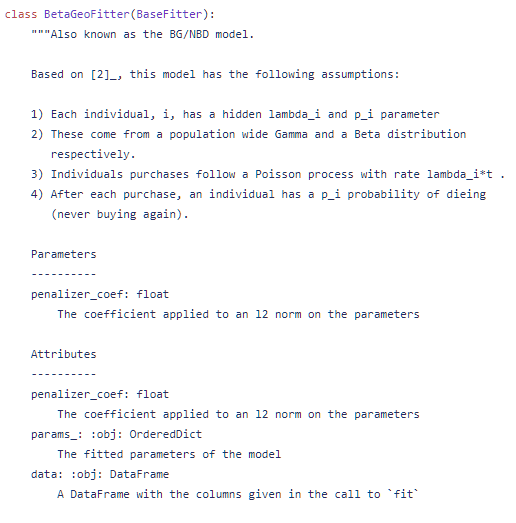